In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [5]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
data["target"] = np.where((data["Sales"] < 9),"Low","High")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [10]:
data['target'].describe()

count     400
unique      2
top       Low
freq      286
Name: target, dtype: object

In [11]:
data = data.drop(columns = ['Sales'])
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,target
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
from sklearn import preprocessing

data1 = data
label_encoder = preprocessing.LabelEncoder()
data1["ShelveLoc"]= label_encoder.fit_transform(data1["ShelveLoc"])
data1["Urban"]= label_encoder.fit_transform(data1["Urban"])
data1["US"]= label_encoder.fit_transform(data1["US"])
data1["target"]= label_encoder.fit_transform(data1["target"])

data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,target
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [16]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [17]:
# Splitting data into train and test dataset :
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
# Creating Model :
model = RandomForestClassifier(n_estimators = 100, max_features = 4)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [21]:
y_pred = model.predict(x_test)
pred = pd.Series(y_pred)
pd.crosstab(y_test,y_pred)

col_0,0,1
target,,
0,12,10
1,1,57


In [22]:
# Accuracy :
np.mean(y_pred == y_test)

0.8625

In [23]:
importance = model.feature_importances_
importance

array([0.10991714, 0.09723303, 0.09721835, 0.08589413, 0.23446537,
       0.16171188, 0.11999929, 0.059744  , 0.00979236, 0.02402445])

<Axes: >

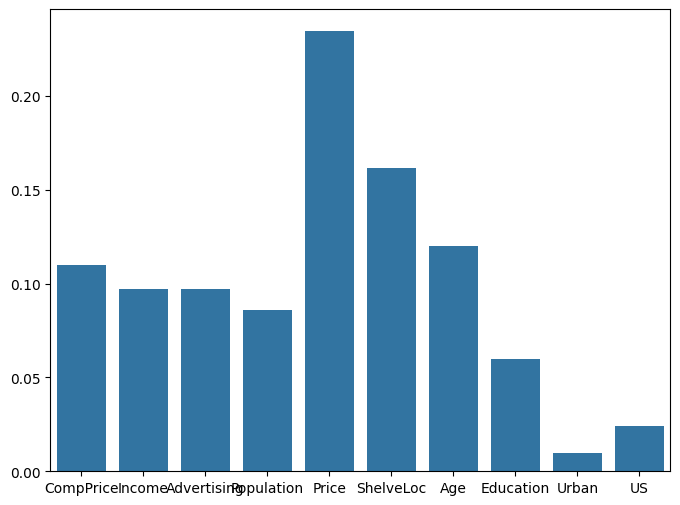

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"], y=model.feature_importances_)